#Importar librerias

In [1]:
#!pip install -q gdown
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.2 MB/s eta 0:00:00


In [2]:
import gdown
import glob, os
import yaml
import random
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import unidecode
import shutil

##Conectar a Google Drive para acceder al dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Control del dataset

## Ver cuantos archivos de imagenes y labels hay

In [ ]:
def get_files_from_folder(folder_path):
    """
    Obtiene una lista de archivos en una carpeta dada.

    :param folder_path: Ruta de la carpeta.
    :return: Lista de nombres de archivos.
    """
    try:
        files = os.listdir(folder_path)
        return [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    except FileNotFoundError:
        print(f"Error: La carpeta {folder_path} no existe.")
        return []

def compare_file_lists(files1, files2):
    """
    Compara los archivos de dos listas de nombres de archivos.

    :param files1: Lista de nombres de archivos de la primera carpeta.
    :param files2: Lista de nombres de archivos de la segunda carpeta.
    """
    # Convertir listas a conjuntos
    set_files1 = set(files1)
    set_files2 = set(files2)

    # Remover extensiones de archivos y convertir nuevamente a conjuntos
    set_files1_no_ext = set(os.path.splitext(file)[0] for file in set_files1)
    set_files2_no_ext = set(os.path.splitext(file)[0] for file in set_files2)

    # Encontrar archivos comunes, solo en la primera lista y solo en la segunda lista
    common_files = set_files1_no_ext.intersection(set_files2_no_ext)
    only_in_files1 = set_files1_no_ext.difference(set_files2_no_ext)
    only_in_files2 = set_files2_no_ext.difference(set_files1_no_ext)

    # Imprimir resultados
    print(f"Archivos comunes en ambas listas ({len(common_files)}):")
    for file in common_files:
        print(file)

    print(f"\nArchivos solo en la primera lista ({len(only_in_files1)}):")
    for file in only_in_files1:
        print(file)

    print(f"\nArchivos solo en la segunda lista ({len(only_in_files2)}):")
    for file in only_in_files2:
        print(file)

In [ ]:
archivos = get_files_from_folder('/content/drive/MyDrive/dataset_cv')
len(archivos)

2790

In [ ]:
labels = []
for f_name in glob.glob(f"/content/drive/MyDrive/dataset_cv/*.txt"):
    base_name = os.path.basename(f_name)
    labels.append(base_name)

len(labels)

1395

In [ ]:
# Diccionario para almacenar listas de archivos por extensión
extensiones = ['jpg', 'jpeg', 'png']
archivos = {ext: [] for ext in extensiones}

# Ruta base
ruta_base = "/content/drive/MyDrive/dataset_cv"

# Iterar sobre cada extensión y llenar el diccionario
for ext in extensiones:
    for f_name in glob.glob(f"{ruta_base}/*.{ext}"):
        base_name = os.path.basename(f_name)
        archivos[ext].append(base_name)

# Imprimir la cantidad de archivos por extensión
for ext in extensiones:
    print(f'{ext}: {len(archivos[ext])}')

# Combinar todas las listas de archivos en una sola lista
imgs = [item for sublist in archivos.values() for item in sublist]


jpg: 420
jpeg: 98
png: 877


In [ ]:
len(imgs)

1395

In [ ]:
compare_file_lists(labels, imgs)

Archivos comunes en ambas listas (1395):
41932688_Simon_Revello_21
46094_Mateo_Rovere_21
A45161_Fabian_Aguirre_31
41932688_Simon_Revello_16
10d2680f1d5794a1f9eb029351d4d59f
12394_escandell_ariel_04
R-45829_Abril_Rodriguez_21
s56804_alexis_segui_08
s56189_salvador_sanchez_0
64191_Sofia_BrizuelaCipolletti_30
51934_pablo_pistelli_07
43237686_Constantino_Ferrucci_6
64191_Sofia_BrizuelaCipolletti_10
43841031_Enzo_Ferrari_10
S57061_Leandro_Salvañá_44
64191_Sofia_BrizuelaCipolletti_03
58912_Timoteo_Garcia_28
429816_cesar_donnarumma_15
A45161_Fabian_Aguirre_02
F37605_florencia_fernandez_39
s56804_alexis_segui_14
58912_Timoteo_Garcia_31
S57061_Leandro_Salvañá_18
g5845_gravifiorino_21
23451_guido_lorenzettibruera_18
52256_daniel_ponce_13
F37605_florencia_fernandez_56
37524_augusto_farias_02
43491353_Alejo_Lo_Menzo (28)
f37478_santiago_ferrero_13
43265_Lucas_Demarré_01
f37478_santiago_ferrero_32
64191_Sofia_BrizuelaCipolletti_09
37494_gustavo_fontana_27
43491353_Alejo_Lo_Menzo (41)
43237686_

Corrijo algunos nombres de archivos

In [ ]:
directory = "/content/drive/MyDrive/dataset_cv"

for filename in os.listdir(directory):
    if 'cesar_donnarumma' in filename and filename[0] == 'd':
        # Eliminar el primer carácter del nombre del archivo
        new_filename = filename[1:]
        # Renombrar el archivo
        os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))

In [ ]:
labels = []
for f_name in glob.glob(f"/content/drive/MyDrive/dataset_cv/*.txt"):
    base_name = os.path.basename(f_name)
    labels.append(base_name)

In [ ]:
# Diccionario para almacenar listas de archivos por extensión
extensiones = ['jpg', 'jpeg', 'png']
archivos = {ext: [] for ext in extensiones}

# Ruta base
ruta_base = "/content/drive/MyDrive/dataset_cv"

# Iterar sobre cada extensión y llenar el diccionario
for ext in extensiones:
    for f_name in glob.glob(f"{ruta_base}/*.{ext}"):
        base_name = os.path.basename(f_name)
        archivos[ext].append(base_name)

# Combinar todas las listas de archivos en una sola lista
imgs = [item for sublist in archivos.values() for item in sublist]


In [ ]:
compare_file_lists(labels, imgs)

Archivos comunes en ambas listas (1395):
41932688_Simon_Revello_21
46094_Mateo_Rovere_21
A45161_Fabian_Aguirre_31
41932688_Simon_Revello_16
10d2680f1d5794a1f9eb029351d4d59f
12394_escandell_ariel_04
R-45829_Abril_Rodriguez_21
s56804_alexis_segui_08
s56189_salvador_sanchez_0
64191_Sofia_BrizuelaCipolletti_30
51934_pablo_pistelli_07
43237686_Constantino_Ferrucci_6
64191_Sofia_BrizuelaCipolletti_10
43841031_Enzo_Ferrari_10
S57061_Leandro_Salvañá_44
64191_Sofia_BrizuelaCipolletti_03
58912_Timoteo_Garcia_28
429816_cesar_donnarumma_15
A45161_Fabian_Aguirre_02
F37605_florencia_fernandez_39
s56804_alexis_segui_14
58912_Timoteo_Garcia_31
S57061_Leandro_Salvañá_18
g5845_gravifiorino_21
23451_guido_lorenzettibruera_18
52256_daniel_ponce_13
F37605_florencia_fernandez_56
37524_augusto_farias_02
43491353_Alejo_Lo_Menzo (28)
f37478_santiago_ferrero_13
43265_Lucas_Demarré_01
f37478_santiago_ferrero_32
64191_Sofia_BrizuelaCipolletti_09
37494_gustavo_fontana_27
43491353_Alejo_Lo_Menzo (41)
43237686_

Agrego manualmente los archivos que faltan y elimino los restantes

## Unificar formatos bounding box

In [ ]:
def convert_segment_to_bbox(segment_annotation):
    coords = list(map(float, segment_annotation.split()[1:]))  # Skip the first value (class)
    x_coords = coords[0::2]
    y_coords = coords[1::2]

    min_x = min(x_coords)
    max_x = max(x_coords)
    min_y = min(y_coords)
    max_y = max(y_coords)

    x_center = (min_x + max_x) / 2
    y_center = (min_y + max_y) / 2
    width = max_x - min_x
    height = max_y - min_y

    return f"{segment_annotation.split()[0]} {x_center} {y_center} {width} {height}"

def process_annotation_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    new_lines = []
    for line in lines:
        if len(line.split()) > 5:  # Assuming segment annotations have more than 5 values
            new_line = convert_segment_to_bbox(line.strip())
            new_lines.append(new_line)
        else:
            new_lines.append(line.strip())  # already in bbox format

    with open(file_path, 'w') as file:
        file.write("\n".join(new_lines) + "\n")

def process_annotations_folder(folder_path):
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            process_annotation_file(os.path.join(folder_path, filename))

In [ ]:
annotations_folder = '/content/drive/MyDrive/dataset_cv'
process_annotations_folder(annotations_folder)

# Division train-test

In [ ]:
import os
import glob
import shutil
import random

# Define los directorios principales
dir = '/content/drive/MyDrive/dataset_cv'

# Crea las carpetas de train y test dentro de dataset
os.makedirs(f"/content/drive/MyDrive/dataset/train/images", exist_ok=True)
os.makedirs(f"/content/drive/MyDrive/dataset/test/images", exist_ok=True)
os.makedirs(f"/content/drive/MyDrive/dataset/train/labels", exist_ok=True)
os.makedirs(f"/content/drive/MyDrive/dataset/test/labels", exist_ok=True)

# Busca todos los archivos de etiquetas
label_files = glob.glob(f"{dir}/*.txt")

# Selecciona un 20% de los archivos de etiquetas para el conjunto de test
test_files = set(random.sample(label_files, k=int(len(label_files) * 0.20)))
print(f"Copiando {len(test_files)} archivos al conjunto de test")

# Mueve archivos de etiquetas al conjunto de test
for f in test_files:
    destination = f"/content/drive/MyDrive/dataset/test/labels/{os.path.basename(f)}"
    shutil.copy(f, destination)

# Mueve los archivos de etiquetas restantes al conjunto de entrenamiento
train_files = [f for f in label_files if f not in test_files]
print(f"Copiando {len(train_files)} archivos al conjunto de entrenamiento")
for f in train_files:
    destination = f"/content/drive/MyDrive/dataset/train/labels/{os.path.basename(f)}"
    shutil.copy(f, destination)

# Función para mover las imágenes correspondientes a las etiquetas
def move_images(label_files, dest_dir):
    for f_name in label_files:
        base_name = os.path.basename(f_name).split(".")[0]
        img_extensions = ['jpg', 'jpeg', 'png']
        for ext in img_extensions:
            img_name = f"{dir}/{base_name}.{ext}"
            if os.path.exists(img_name):
                shutil.copy(img_name, f"{dest_dir}/{os.path.basename(img_name)}")
                break

# Mueve imágenes correspondientes al conjunto de test
move_images(test_files, "/content/drive/MyDrive/dataset/test/images")

# Mueve imágenes correspondientes al conjunto de entrenamiento
move_images(train_files, "/content/drive/MyDrive/dataset/train/images")


Copiando 279 archivos al conjunto de test
Copiando 1116 archivos al conjunto de entrenamiento


In [ ]:
txtsval = get_files_from_folder('/content/drive/MyDrive/dataset/test/labels')
imgsval = get_files_from_folder('/content/drive/MyDrive/dataset/test/images')

txtstrain = get_files_from_folder('/content/drive/MyDrive/dataset/train/labels')
imgstrain = get_files_from_folder('/content/drive/MyDrive/dataset/train/images')

len(txtsval), len(imgsval), len(txtstrain), len(txtstrain)

(498, 498, 1335, 1335)

# ANALISIS EXPLORATORIO


Se realiza un analisis para ver como esta compuesto el dataset de imagenes,
el tamaño promedio de estas, el balance de clases, y tambien se analizara los bounding boxes para ver si todavia quedan algunos con discrepancias.

In [ ]:
from collections import defaultdict

# Inicializar un diccionario para contar la frecuencia de cada clase
class_counts = defaultdict(int)

# Función para verificar la coherencia de los bounding boxes
def is_bounding_box_valid(x_center, y_center, width, height):
    return 0 <= x_center <= 1 and 0 <= y_center <= 1 and 0 <= width <= 1 and 0 <= height <= 1

# Inicializar variables para las clases y los bounding boxes inválidos
invalid_bounding_boxes = []
classes = set()

# Analizar los archivos de etiquetas
for file_path in txtstrain:
    with open(f"/content/drive/MyDrive/dataset/train/labels/{os.path.basename(file_path)}", 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id, x_center, y_center, width, height = parts
                class_id = int(class_id)
                x_center, y_center, width, height = map(float, [x_center, y_center, width, height])

                # Contar la clase
                class_counts[class_id] += 1
                classes.add(class_id)

                # Verificar la coherencia de los bounding boxes
                if not is_bounding_box_valid(x_center, y_center, width, height):
                    invalid_bounding_boxes.append((file_path, line.strip()))

# Resultados del análisis
num_classes = len(classes)
class_counts = dict(class_counts)
invalid_bounding_boxes_count = len(invalid_bounding_boxes)
unique_files = set(file for file, _ in invalid_bounding_boxes)

In [ ]:
print('Numero de clases: ', num_classes)
print('Frecuencia de cada clase: ', class_counts)

print('Cantidad bbox invalidos: ',invalid_bounding_boxes_count)
print('Cantidad de imagenes con bbox invalidos: ', len(unique_files))

Numero de clases:  52
Frecuencia de cada clase:  {8: 345, 7: 344, 20: 339, 3: 352, 44: 310, 4: 353, 19: 337, 42: 324, 10: 332, 6: 362, 12: 347, 9: 326, 46: 334, 29: 276, 31: 258, 21: 327, 37: 346, 0: 333, 15: 357, 5: 344, 41: 318, 39: 321, 43: 332, 47: 329, 23: 348, 27: 373, 1: 326, 17: 363, 45: 324, 26: 342, 11: 355, 25: 350, 40: 354, 34: 285, 32: 250, 24: 352, 18: 380, 48: 270, 13: 367, 14: 360, 2: 352, 28: 246, 33: 244, 16: 362, 35: 256, 22: 344, 30: 244, 38: 332, 36: 341, 50: 4, 49: 14, 51: 2}
Cantidad bbox invalidos:  52
Cantidad de imagenes con bbox invalidos:  22


Tenemos 22 imagenes con boundings box incorrectos, que luego YOLO en el entrenamiento ignorará

In [ ]:
# Mapeo de IDs de categorías a nombres
classes = [
    "1O", "1C", "1E", "1B",
    "2O", "2C", "2E", "2B",
    "3O", "3C", "3E", "3B",
    "4O", "4C", "4E", "4B",
    "5O", "5C", "5E", "5B",
    "6O", "6C", "6E", "6B",
    "7O", "7C", "7E", "7B",
    "8O", "8C", "8E", "8B",
    "9O", "9C", "9E", "9B",
    "10O", "10C", "10E", "10B",
    "11O", "11C", "11E", "11B",
    "12O", "12C", "12E", "12B",
    "J", "SKIP", "SSKIP", "SSSKIP"
]

category_id_to_name = {i: class_name for i, class_name in enumerate(classes)}

# Crear listas para los nombres de las clases y sus frecuencias
class_names = [category_id_to_name[class_id] for class_id in sorted(class_counts.keys())]
frequencies = [class_counts[class_id] for class_id in sorted(class_counts.keys())]


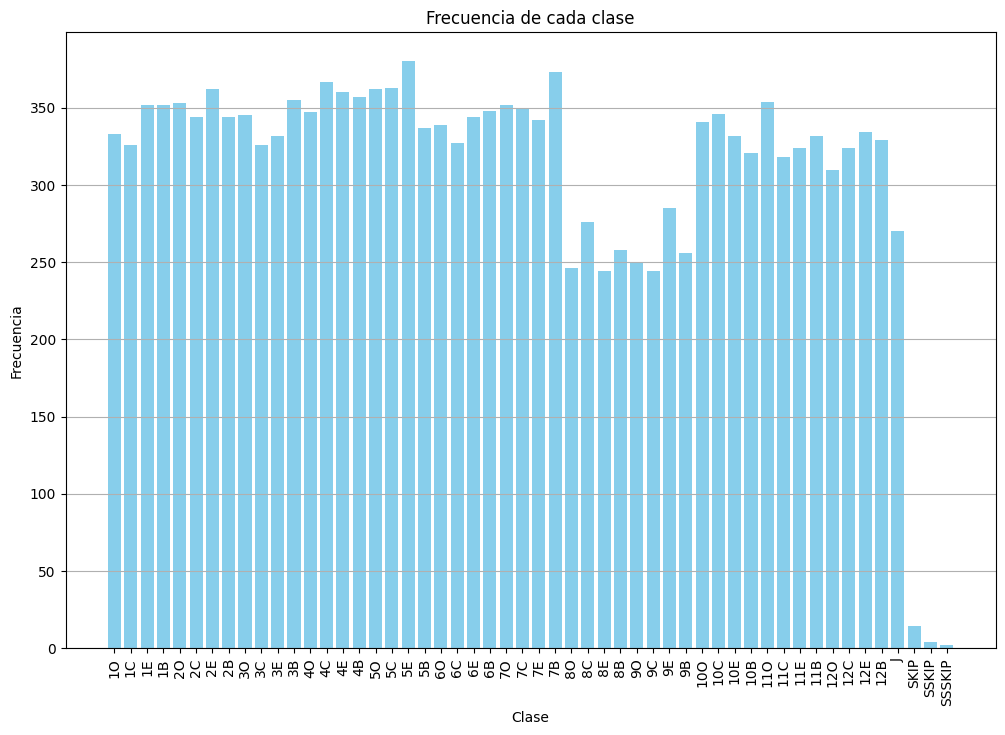

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(12, 8))
plt.bar(class_names, frequencies, color='skyblue')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de cada clase')
plt.grid(axis='y')
plt.xticks(rotation=90)

# Mostrar la gráfica
plt.show()

El resultado es esperable, ya que hay menos 8 y 9 porque para el truco no se necesitan, J son los comodines asi que tampoco y los SKIP del final son valores erroneos de las anotaciones. Luego con las otras cartas tanemos cantidades similares entre 320 y 370.

Ahora se muestra la ruta de los archivos que contienen las clases con menor frecuencia para comprobar lo anterior

In [ ]:
# Identificar clases que aparecen menos cantidad de veces, por ejemplo, menos de 10 veces
rare_classes = {class_id: count for class_id, count in class_counts.items() if count < 20}

# Inicializar un diccionario para almacenar los archivos donde aparecen estas clases
rare_classes_files = defaultdict(list)

# Analizar nuevamente los archivos de etiquetas para identificar dónde aparecen las clases raras
for file_path in txtstrain:
    with open(f"/content/drive/MyDrive/dataset/train/labels/{os.path.basename(file_path)}", 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                class_id = int(parts[0])
                if class_id in rare_classes:
                    rare_classes_files[class_id].append(file_path)

# Convertir el defaultdict a un dict para facilitar la visualización
rare_classes_files = dict(rare_classes_files)

rare_classes_files


{50: ['aug_gravifiorino_7.txt',
  'aug_s56804_alexis_segui_13.txt',
  'gravifiorino_7.txt',
  's56804_alexis_segui_13.txt'],
 49: ['aug_293cf3fc96a4dbd5d6004436ddc39b48.txt',
  'aug_g5845_gravifiorino_27.txt',
  'aug_s56804_alexis_segui_13.txt',
  'aug_43237686_Constantino_Ferrucci_17.txt',
  'aug_58491_fabio_giampaoli_21.txt',
  'aug_w05576_juan_wagner_06.txt',
  '293cf3fc96a4dbd5d6004436ddc39b48.txt',
  's56804_alexis_segui_13.txt',
  'g5845_gravifiorino_27.txt',
  '43237686_Constantino_Ferrucci_17.txt',
  'aug_w05576_juan_wagner_12.txt',
  '58491_fabio_giampaoli_21.txt',
  'w05576_juan_wagner_12.txt',
  'w05576_juan_wagner_06.txt'],
 51: ['aug_gravifiorino_1.txt', 'gravifiorino_1.txt']}

Podemos buscar estos archivos y etiquetarlos bien manualmente o eliminarlos para que no afecten al modelo. En este caso los voy a dejar, esto no genera error pero puede reducir un poco la precision.

Ahora se analiza el tamaño de las imágenes.

In [ ]:
import os
from PIL import Image
import numpy as np

def analyze_image_sizes(folder_path):
    widths = []
    heights = []

    for filename in os.listdir(folder_path):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(folder_path, filename)
            try:
              with Image.open(image_path) as img:
                  width, height = img.size
                  widths.append(width)
                  heights.append(height)
            except: pass

    avg_width = np.mean(widths)
    avg_height = np.mean(heights)

    return avg_width, avg_height, widths, heights

# Carpeta con las imágenes de entrenamiento
folder_path = "/content/drive/MyDrive/dataset/train/images"

# Analizar los tamaños de las imágenes
avg_width, avg_height, widths, heights = analyze_image_sizes(folder_path)

print(f"Promedio de ancho: {avg_width}")
print(f"Promedio de altura: {avg_height}")
print(f"Ancho mínimo: {min(widths)}")
print(f"Ancho máximo: {max(widths)}")
print(f"Altura mínima: {min(heights)}")
print(f"Altura máxima: {max(heights)}")

Promedio de ancho: 2158.949448878753
Promedio de altura: 2275.0973014063093
Ancho mínimo: 331
Ancho máximo: 5664
Altura mínima: 314
Altura máxima: 5664


Al ser imágenes tomadas por distintas personas en diferentes contextos, obtenemos tamaños muy variables. El tamaño promedio de las imagenes es 2158 x 2275, sin embargo el tamaño de entrada de las imagenes que se le pasaran al modelo es de 512 x 512, ya que mientras mas grande sea el tamaño se necesitan mas recursos.

## Fifty One

Se visualizan los archivos con sus bounding boxes para verificar que el trabajo que realice este correcto.

Se crea un archivo .yaml para poder cargarlo con fifty one

In [29]:
train_config = \
f"""
# Train/val/test dataset configuration
train: /content/drive/MyDrive/dataset/train/images
val: /content/drive/MyDrive/dataset/test/images

# Number of classes
nc: {len(classes)}

# Class names
names: {classes}
"""

# Save yaml
with open('/content/drive/MyDrive/TP Final CV/dataset.yaml', 'w') as f:
    f.write(train_config)

In [5]:
%%capture
!pip install -U fiftyone

import fiftyone as fo

In [6]:
name = 'dataset'
dataset_dir = '/content/drive/MyDrive/TP Final CV/'

ds = fo.Dataset.from_dir(
    dataset_dir=dataset_dir,
    dataset_type=fo.types.YOLOv5Dataset(),
    name=name,
    persistent=True
)

ds.save()

ds

INFO:fiftyone.migrations.runner:Migrating database to v0.24.1


INFO:eta.core.utils: 100% |█████████████████| 498/498 [2.6m elapsed, 0s remaining, 3.4 samples/s]      


Name:        dataset
Media type:  image
Num samples: 498
Persistent:  True
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [7]:
ds.compute_metadata(overwrite=True)
session = fo.launch_app(ds,auto=False)

INFO:fiftyone.core.metadata:Computing metadata...


INFO:eta.core.utils: 100% |█████████████████| 498/498 [2.6m elapsed, 0s remaining, 6.1 samples/s]      


INFO:fiftyone.core.session.session:Session launched. Run `session.show()` to open the App in a cell output.
INFO:fiftyone.core.session.session:
Welcome to

███████╗██╗███████╗████████╗██╗   ██╗ ██████╗ ███╗   ██╗███████╗
██╔════╝██║██╔════╝╚══██╔══╝╚██╗ ██╔╝██╔═══██╗████╗  ██║██╔════╝
█████╗  ██║█████╗     ██║    ╚████╔╝ ██║   ██║██╔██╗ ██║█████╗
██╔══╝  ██║██╔══╝     ██║     ╚██╔╝  ██║   ██║██║╚██╗██║██╔══╝
██║     ██║██║        ██║      ██║   ╚██████╔╝██║ ╚████║███████╗
╚═╝     ╚═╝╚═╝        ╚═╝      ╚═╝    ╚═════╝ ╚═╝  ╚═══╝╚══════╝ v0.24.1

If you're finding FiftyOne helpful, here's how you can get involved:

|
|  ⭐⭐⭐ Give the project a star on GitHub ⭐⭐⭐
|  https://github.com/voxel51/fiftyone
|
|  🚀🚀🚀 Join the FiftyOne Slack community 🚀🚀🚀
|  https://slack.voxel51.com
|



In [8]:
session.show()